              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



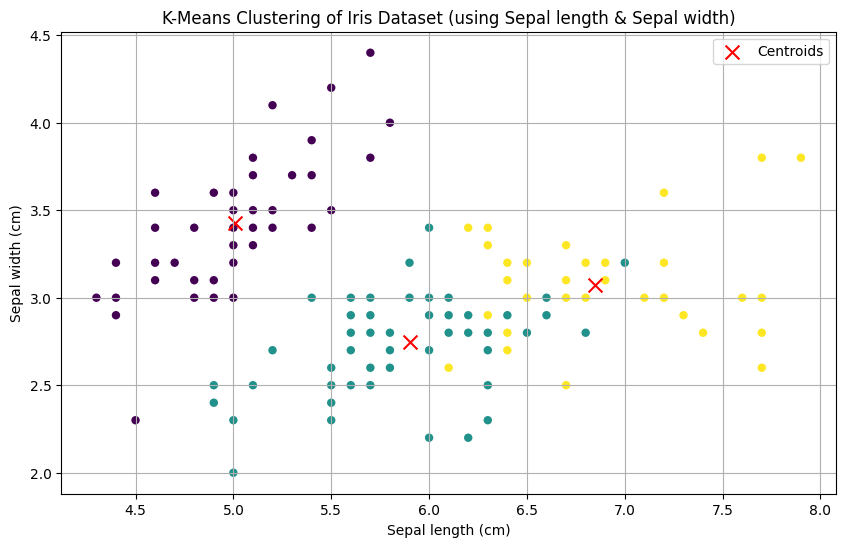

In [5]:
# Importing necessary libraries and redefining the KMeans class
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import classification_report

class KMeans:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, data):
        initial_indices = np.random.choice(len(data), self.k, replace=False)
        self.centroids = data[initial_indices]

        for _ in range(self.max_iters):
            labels = self._assign(data)
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.k)])

            if np.sum((new_centroids - self.centroids) ** 2) < self.tolerance:
                break
            self.centroids = new_centroids

        self.labels_ = self._assign(data)

    def _assign(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, data):
        return self._assign(data)

# Loading the Iris dataset and applying KMeans
iris = datasets.load_iris()
iris_data = iris.data
kmeans_iris = KMeans(k=3)
kmeans_iris.fit(iris_data)

# Map the predicted labels to the true labels
def map_labels(true_labels, predicted_labels):
    mapped_labels = np.zeros_like(predicted_labels)
    for i in range(3):
        mask = (predicted_labels == i)
        mapped_labels[mask] = np.bincount(true_labels[mask]).argmax()
    return mapped_labels

mapped_predictions = map_labels(iris.target, kmeans_iris.labels_)

# Generating the classification report
report = classification_report(iris.target, mapped_predictions, target_names=iris.target_names)
print(report)

plt.figure(figsize=(10, 6))
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=kmeans_iris.labels_, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(kmeans_iris.centroids[:, 0], kmeans_iris.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering of Iris Dataset (using Sepal length & Sepal width)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

     class_0       0.98      0.78      0.87        59
     class_1       0.72      0.70      0.71        71
     class_2       0.47      0.60      0.53        48

    accuracy                           0.70       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.74      0.70      0.71       178



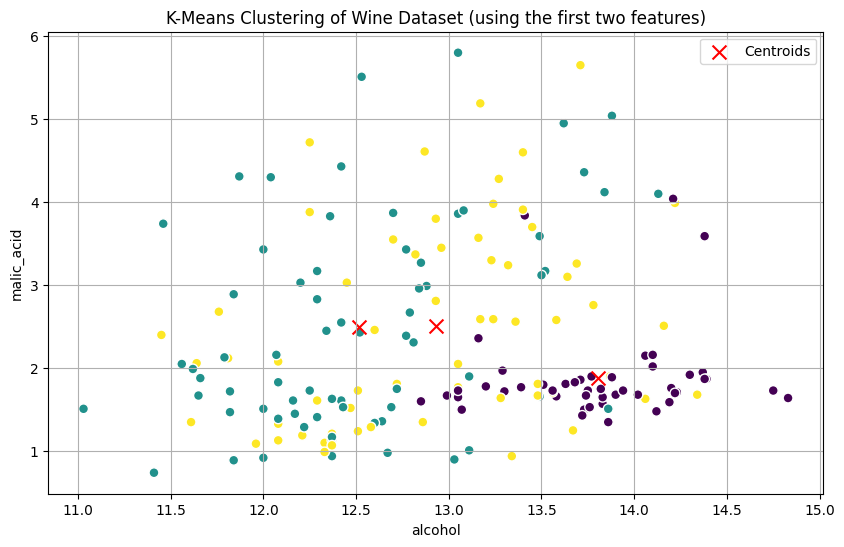

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# KMeans Class Definition
class KMeans:
    def __init__(self, k=3, max_iters=200, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, data):
        initial_indices = np.random.choice(len(data), self.k, replace=False)
        self.centroids = data[initial_indices]

        for _ in range(self.max_iters):
            labels = self._assign(data)
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.k)])

            if np.sum((new_centroids - self.centroids) ** 2) < self.tolerance:
                break
            self.centroids = new_centroids

        self.labels_ = self._assign(data)

    def _assign(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, data):
        return self._assign(data)

# Load the Wine dataset
wine = datasets.load_wine()
wine_data = wine.data

# Fit the KMeans algorithm to the Wine dataset
kmeans_wine = KMeans(k=3)
kmeans_wine.fit(wine_data)

# Map the predicted labels to the true labels
def map_labels(true_labels, predicted_labels):
    mapped_labels = np.zeros_like(predicted_labels)
    for i in range(3):
        mask = (predicted_labels == i)
        mapped_labels[mask] = np.bincount(true_labels[mask]).argmax()
    return mapped_labels

mapped_predictions_wine = map_labels(wine.target, kmeans_wine.labels_)

# Generate the classification report for the Wine dataset
report_wine = classification_report(wine.target, mapped_predictions_wine, target_names=wine.target_names)
print(report_wine)

# For visualization purposes, we'll use the first two features of the Wine dataset for a 2D representation.
plt.figure(figsize=(10, 6))
plt.scatter(wine_data[:, 0], wine_data[:, 1], c=mapped_predictions_wine, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(kmeans_wine.centroids[:, 0], kmeans_wine.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering of Wine Dataset (using the first two features)")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()
plt.grid(True)
plt.show()

Modify the k-mean algorithm to use a simplified “Mahalanobis” distance defined as follows,
d(x,y) =(x-y)^T C(x-y) where C is a positive diagonal matrix with a rank equal to n in the data dimension.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for iris using kmeans(euclidean) vs mahalonobis:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.94      0.85        50
   virginica       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

              precision    recall  f1-score   support

      setosa       1.00      0.98      0.99        50
  versicolor       0.80      0.74      0.77        50
   virginica       0.76      0.84      0.80        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150

Classification Report for wine using kmeans(euclidean) vs mahalonobis:
              precision    recall  f1-score   support

     class_0       0.76      0.98      0.

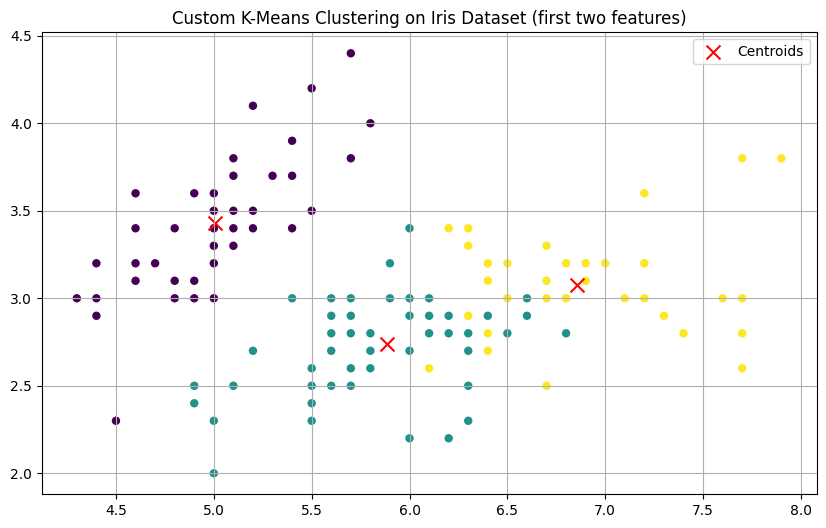

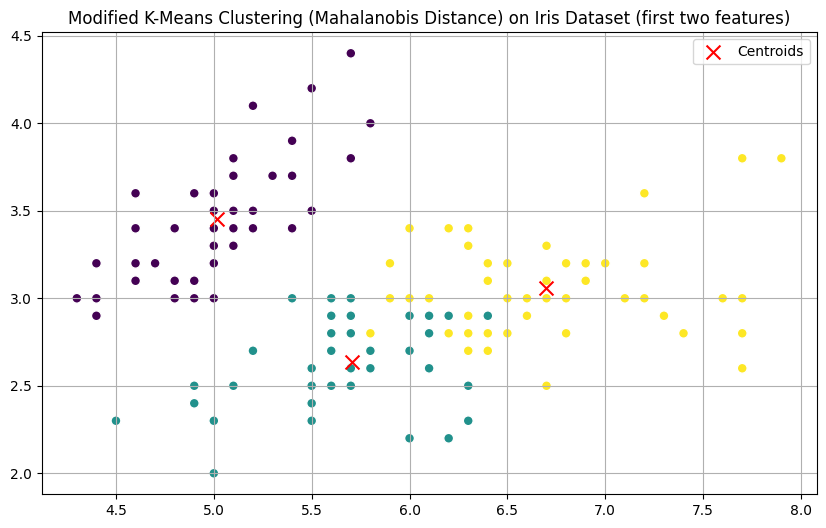

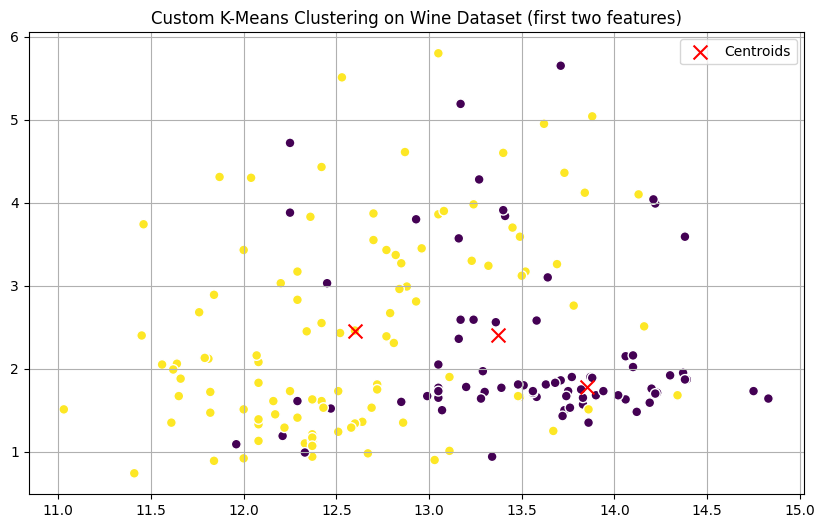

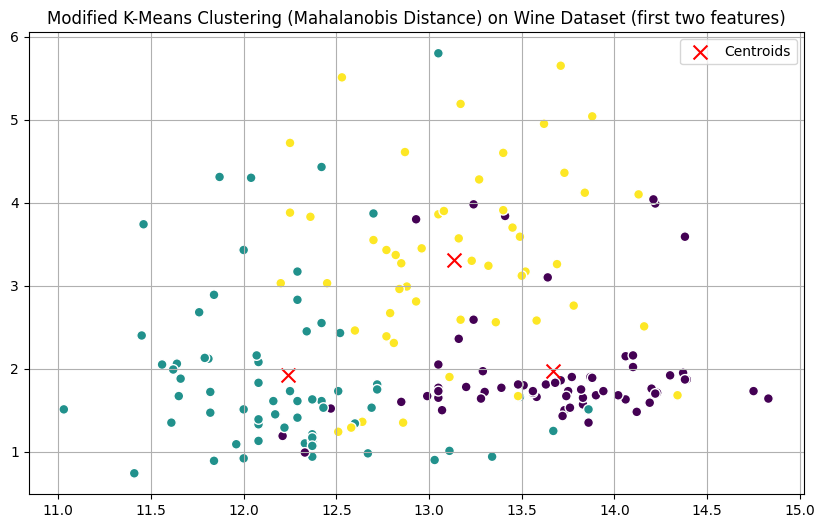

In [8]:
# Importing necessary libraries
import numpy as np                    # Provides numerical operations and array support
from sklearn import datasets          # Provides datasets, in this case, the Iris and Wine datasets
from sklearn.metrics import confusion_matrix  # For generating a confusion matrix
import matplotlib.pyplot as plt       # For plotting and visualization
from sklearn.metrics import classification_report

# Load datasets
iris = datasets.load_iris()        # Load the Iris dataset from sklearn's datasets module
iris_data = iris.data              # Extract the feature data from the Iris dataset
wine = datasets.load_wine()        # Load the Wine dataset from sklearn's datasets module
wine_data = wine.data              # Extract the feature data from the Wine dataset

# Function to map labels for comparison with true labels
def map_labels(true_labels, predicted_labels):
    # Create an empty array with zeros of the same shape as the predicted labels
    mapped_labels = np.zeros_like(predicted_labels)
    for i in range(3): # Iterate over each of the three labels (0, 1, 2)
        # Create a mask where predicted labels match the current label i
        mask = (predicted_labels == i)
        # Map the label i to the most frequent true label in the predicted cluster
        mapped_labels[mask] = np.bincount(true_labels[mask]).argmax()
    return mapped_labels  # Return the mapped labels

# Custom KMeans class
class KMeans:
    # Initialization method for the KMeans class
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum iterations for the KMeans algorithm
        self.tolerance = tolerance  # Convergence tolerance

    # Fit method to train the KMeans model on provided data
    def fit(self, data):
        # Randomly select initial centroids from the data
        initial_indices = np.random.choice(len(data), self.k, replace=False)
        self.centroids = data[initial_indices]

        # Main loop for the KMeans algorithm
        for _ in range(self.max_iters):
            labels = self._assign(data)  # Assign each data point to the nearest centroid
            # Compute new centroids as the mean of data points in each cluster
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.k)])

            # Check convergence criterion based on change in centroids
            if np.sum((new_centroids - self.centroids) ** 2) < self.tolerance:
                break

            self.centroids = new_centroids  # Update centroids

        self.labels_ = self._assign(data)  # Final assignment of data points to clusters

    # Helper method to assign each data point to the nearest centroid
    def _assign(self, data):
        # Compute Euclidean distances between each data point and all centroids
        distances = np.array([np.linalg.norm(point - centroid) for point in data for centroid in self.centroids])
        distances = distances.reshape(len(data), self.k)  # Reshape the distances array
        return np.argmin(distances, axis=1)  # Return the index of the nearest centroid for each data point

# Modified KMeans using Mahalanobis distance
class KMeans_Mahalanobis(KMeans):
    # Overridden fit method to incorporate Mahalanobis distance
    def fit(self, data):
        # Compute the C matrix for Mahalanobis distance
        self.C = np.diag(1.0 / np.var(data, axis=0))
        super().fit(data)  # Call the fit method of the parent KMeans class

    # Overridden _assign method to use Mahalanobis distance instead of Euclidean distance
    def _assign(self, data):
        # Compute Mahalanobis distances between each data point and all centroids
        distances = np.array([self._mahalanobis_distance(point, centroid) for point in data for centroid in self.centroids])
        distances = distances.reshape(len(data), self.k)  # Reshape the distances array
        return np.argmin(distances, axis=1)  # Return the index of the nearest centroid for each data point

    # Helper method to compute the Mahalanobis distance
    def _mahalanobis_distance(self, x, y):
        diff = x - y
        return np.dot(diff, np.dot(self.C, diff))  # Mahalanobis distance formula

# Visualization function to plot clusters
def plot_clusters(data, centroids, predictions, title):
    plt.figure(figsize=(10, 6))  # Set the figure size
    # Scatter plot of data points colored by their cluster assignments
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis', marker='o', edgecolors='w', s=50)
    # Scatter plot of centroids in red color
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(title)  # Set the title of the plot
    plt.grid(True)  # Display grid
    plt.legend()  # Display legend
    plt.show()  # Display the plot

# Applying KMeans clustering for both datasets
kmeans_iris = KMeans(k=3)
kmeans_iris.fit(iris_data)
mapped_predictions_iris = map_labels(iris.target, kmeans_iris.labels_)
report_kmeans_iris = classification_report(iris.target, mapped_predictions_iris, target_names=iris.target_names)

kmeans_mahalanobis_iris = KMeans_Mahalanobis(k=3)
kmeans_mahalanobis_iris.fit(iris_data)
mapped_predictions_mahalanobis_iris = map_labels(iris.target, kmeans_mahalanobis_iris.labels_)
report_mahalanobis_iris = classification_report(iris.target, mapped_predictions_mahalanobis_iris, target_names=iris.target_names)

kmeans_wine = KMeans(k=3)
kmeans_wine.fit(wine_data)
mapped_predictions_wine = map_labels(wine.target, kmeans_wine.labels_)
report_kmeans_wine = classification_report(wine.target, mapped_predictions_wine, target_names=wine.target_names)

kmeans_mahalanobis_wine = KMeans_Mahalanobis(k=3)
kmeans_mahalanobis_wine.fit(wine_data)
mapped_predictions_mahalanobis_wine = map_labels(wine.target, kmeans_mahalanobis_wine.labels_)
report_mahalanobis_wine = classification_report(wine.target, mapped_predictions_mahalanobis_wine, target_names=wine.target_names)

print("Classification Report for iris using kmeans(euclidean) vs mahalonobis:")

print(report_kmeans_iris)
print(report_mahalanobis_iris)

print("Classification Report for wine using kmeans(euclidean) vs mahalonobis:")

print(report_kmeans_wine)
print(report_mahalanobis_wine)

# Generating confusion matrices
confusion_matrix_iris_custom = confusion_matrix(iris.target, mapped_predictions_iris)
confusion_matrix_iris_mahalanobis = confusion_matrix(iris.target, mapped_predictions_mahalanobis_iris)
confusion_matrix_wine_custom = confusion_matrix(wine.target, mapped_predictions_wine)
confusion_matrix_wine_mahalanobis = confusion_matrix(wine.target, mapped_predictions_mahalanobis_wine)

print(confusion_matrix_iris_custom)
print(confusion_matrix_iris_mahalanobis)
print(confusion_matrix_wine_custom)
print(confusion_matrix_wine_mahalanobis)

# Visualizing clustering results for both implementations on both datasets
plot_clusters(iris_data, kmeans_iris.centroids, mapped_predictions_iris, "Custom K-Means Clustering on Iris Dataset (first two features)")
plot_clusters(iris_data, kmeans_mahalanobis_iris.centroids, mapped_predictions_mahalanobis_iris, "Modified K-Means Clustering (Mahalanobis Distance) on Iris Dataset (first two features)")
plot_clusters(wine_data, kmeans_wine.centroids, mapped_predictions_wine, "Custom K-Means Clustering on Wine Dataset (first two features)")
plot_clusters(wine_data, kmeans_mahalanobis_wine.centroids, mapped_predictions_mahalanobis_wine, "Modified K-Means Clustering (Mahalanobis Distance) on Wine Dataset (first two features)")
